# Clustering Assignment

# Understanding the Business Requirement

In [1]:
#_____________________DATA________________________
#the data set has details of various Hollywood movies
#It is in a text format, each column is separated by a | (pipe)
# there are no column names. the names of the columns are as below- use these
# "ID","Title","Release_Date","Video_Release_Date","IMDB",
#"Unknown","Action",#"Adventure","Animation","Childrens","Comedy","Crime","Documentary"
#"Drama","Fantasy","FilmNoir","Horror","Musical","Mystery","Ramance","Sci-fi",
#"Thriller","War","Western"
#the column names Unknown to Western are all genre of the movies--
#Unknown means--Genre for that movies unknown.

#___________________REQUIREMENT__________________

#so you have data on several movies. We will use a content filtering approach of reccomendation system
# that is. we wil only use the properties of the movies to create similar groups
#if you forgot what is Content & Collaborative filtering, go back to the classroom videos.
#We will create some groups of similar movies and if a person like any movie in a group 
#we will recommend him other movies in the same group. This is a very basic RECMMENDATION ENGINE.
#of course what companies like amazon,netflix,etc use are complex algorithms but this forms the base.

In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage #this will be useful for heirarchical Clusters
import numpy as np
import pandas as pd
%matplotlib inline
np.set_printoptions(precision=5, suppress=True) 

In [2]:
df=pd.read_csv("data1.txt",sep="|",names=["ID","Title","Release_Date","IMDB","Unknown","Action","Adventure","Animation","Childrens","Comedy","Crime","Documentary","Drama","Fantasy","FilmNoir","Horror","Musical","Mystery","Romance","Sci-fi","Thriller","War","Western"],encoding='latin-1')

In [3]:
df.head()

,ID,Title,Release_Date,IMDB,Unknown,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,Sci-fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0.0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0


In [4]:
df.isnull().sum()

ID              0
Title           0
Release_Date    1
IMDB            2
Unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
FilmNoir        0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-fi          0
Thriller        0
War             0
Western         1
dtype: int64

In [6]:
df.shape

(1682, 23)

In [5]:
sum(df.duplicated('Title'))

18

In [6]:
df.drop_duplicates(subset=['Title'],inplace=True)
print(df.shape) # deleted 18 duplicates..
#remove unwanted columns--
df_final=df.drop(['ID','Release_Date','IMDB'],axis=1)
print(df_final.head())

(1664, 23)
               Title  Unknown  Action  Adventure  Animation  Childrens  \
0   Toy Story (1995)        0       0          0          1          1   
1   GoldenEye (1995)        0       1          1          0          0   
2  Four Rooms (1995)        0       0          0          0          0   
3  Get Shorty (1995)        0       1          0          0          0   
4     Copycat (1995)        0       0          0          0          0   

   Comedy  Crime  Documentary  Drama  Fantasy  FilmNoir  Horror  Musical  \
0       1      0            0      0        0         0       0        0   
1       0      0            0      0        0         0       0        0   
2       0      0            0      0        0         0       0        0   
3       1      0            0      1        0         0       0        0   
4       0      1            0      1        0         0       0        0   

   Mystery  Romance  Sci-fi  Thriller  War  Western  
0        0        0       0      

In [7]:
sum(df.duplicated('Title'))

0

In [10]:
df_final.isnull().sum()

Title          0
Unknown        0
Action         0
Adventure      0
Animation      0
Childrens      0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
FilmNoir       0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-fi         0
Thriller       0
War            0
Western        1
dtype: int64

In [8]:
df_final['Western'].mode()

0    0.0
dtype: float64

In [9]:
df_final['Western'].fillna(value=0.0,inplace=True)

In [10]:
df_final.isnull().sum()

Title          0
Unknown        0
Action         0
Adventure      0
Animation      0
Childrens      0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
FilmNoir       0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-fi         0
Thriller       0
War            0
Western        0
dtype: int64

# Silhoutte analysis

In [ ]:
df=df_final.drop(['Title'],axis=1)

6365.22415865
3133.92763211
2051.3631973
1502.86574205
1322.81719048
1166.97177111
1094.9908473
1038.3865648
975.424852196


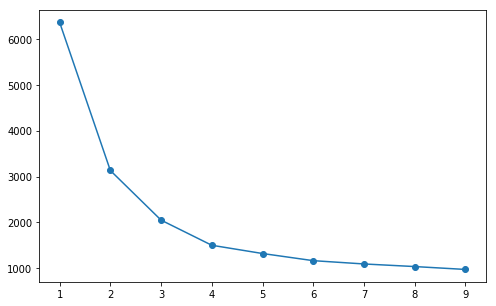

In [32]:
cluster_range = range(1,10)
cluster_errors = []

for i in cluster_range:
  clusters = KMeans( i )
  clusters.fit(df_final.drop(['Title'],axis=1))
  print(clusters.inertia_)
  cluster_errors.append(clusters.inertia_)

plt.figure(figsize=(8,5))
plt.plot( cluster_range, cluster_errors, marker = "o" )

In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6,n_init=20) #see explanation of  n_init in adv & disadv of k means below
kmeans.fit(df_final.drop(['Title'],axis=1))
y_kmeans = kmeans.predict(df_final.drop(['Title'],axis=1))
print(y_kmeans)

[0 4 3 ..., 3 1 2]


In [42]:
df_final['Cluster']=y_kmeans

In [43]:
df_final

,Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,FilmNoir,Horror,Musical,Mystery,Romance,Sci-fi,Thriller,War,Western,Cluster
0,Toy Story (1995),0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
1,GoldenEye (1995),0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.0,4
2,Four Rooms (1995),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.0,3
3,Get Shorty (1995),0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0.0,1
4,Copycat (1995),0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0.0,2
5,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.0,2
6,Twelve Monkeys (1995),0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0.0,2
7,Babe (1995),0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0.0,1
8,Dead Man Walking (1995),0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.0,2
9,Richard III (1995),0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0.0,2


In [31]:
plt.figure(figsize=(6, 4))
plt.scatter(df_final,c=y_kmeans, cmap='prism')  # plot points with y_kmeans dependent colors
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

In [44]:
df1=df_final.groupby(['Cluster']).mean()
df1

,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,Sci-fi,Thriller,War,Western
Cluster,,,,,,,,,,,,,,,,,,,
0,0.000000,0.020202,0.383838,0.323232,1.000000,0.383838,0.000000,0.000000,0.050505,0.121212,0.000000,0.000000,0.212121,0.020202,0.040404,0.030303,0.000000,0.000000,0.010101
1,0.000000,0.039911,0.004435,0.008869,0.004435,1.000000,0.028825,0.002217,0.197339,0.006652,0.000000,0.024390,0.035477,0.017738,0.206208,0.017738,0.026608,0.024390,0.013304
2,0.000000,0.047697,0.006579,0.000000,0.019737,0.000000,0.069079,0.004934,1.000000,0.006579,0.003289,0.008224,0.013158,0.021382,0.136513,0.013158,0.080592,0.055921,0.008224
3,0.000000,0.000000,0.029126,0.009709,0.000000,0.000000,0.174757,0.000000,0.000000,0.000000,0.135922,0.135922,0.000000,0.203883,0.067961,0.106796,1.000000,0.000000,0.000000
4,0.000000,1.000000,0.360000,0.010000,0.035000,0.065000,0.085000,0.000000,0.070000,0.010000,0.000000,0.065000,0.010000,0.040000,0.105000,0.270000,0.420000,0.065000,0.010000
5,0.004926,0.000000,0.068966,0.014778,0.000000,0.000000,0.083744,0.226601,0.000000,0.004926,0.039409,0.231527,0.044335,0.039409,0.177340,0.078818,0.000000,0.064039,0.064039


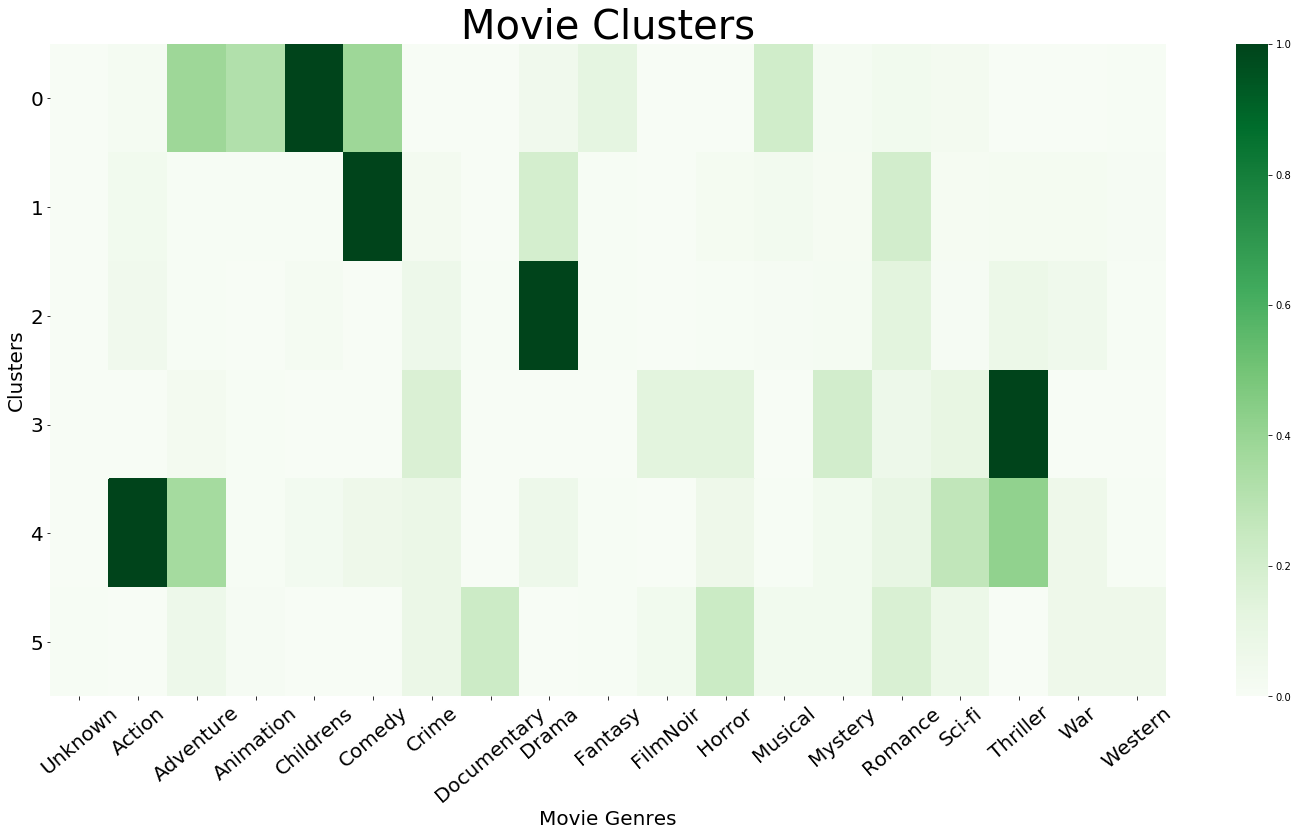

In [45]:
import seaborn as sns
plt.figure(figsize=(25, 12))
g=sns.heatmap(df1,cmap="Greens")# https://matplotlib.org/users/colormaps.html for some amazing colors
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 20)
g.set_xticklabels(g.get_xticklabels(), rotation = 40, fontsize = 20)
plt.title('Movie Clusters',fontsize=40)
plt.xlabel('Movie Genres',fontsize=20)
plt.ylabel('Clusters',fontsize=20)

In [11]:
df1=df_final[df_final['Cluster']==12]

KeyError: 'Cluster'

In [46]:
df_final.to_csv('kcluster.csv',index=False)

In [ ]:
#comedy -92, drama-21,romance-20- cluster 1
#drama-100- cluster 2
#action-18,drama-59,romance-73,war-35- cluster 3
#action-68,adventure-38,scifi-33,thriller-30- cluster 4
#crime-41,drama-36,mystery-25,thriller-62- cluster 5
#animation -38,children-90,comedy-45,musical-23
#documentary-41,horror-58- cluster 7

# Data Cleaning

In [27]:
#Clean the data and get rid of unwanted columns that you feel will not be used for Clustering.
#there might be duplicate rows in the data. Get rid of those as well.
# bring the data to a well structured format to start the clustering process




# Hierarchical Clustering 

In [28]:
#Write of codes for hierarchical clusering here-



# deciding number of clusters

In [29]:
#draw the dendogram and decide what is the best choice of the number of clusters.
#Dont just decide based on dendogram, the # of clusters should also make sense.
#Use your understanding of movies to decide, int how many groups should you divide all exsting movies
#e.g. May be Action, War, Adventure, Sci-fi genre can be put in one group, similarly for others..




# Create the clusters

In [30]:
#Add the cluster Numbers into the cleaned DataFrame that you used earlier.


# Present your results

In [31]:
#prove that the Clustering that you have done Makes sense. Study Each CLuster that you have formed.
#May be descriptive statistics of each clusters might help.
#Do somethg to convince your audience. Create some plots..



# K Means Clustering

In [32]:
#repeat the entire exercise with K means clustering. See which one makes more sense.
#Do they group movies in the same cluster. e.g. Are Batman and Star wars are in the same cluster 
#by moth methods?


